<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/tcc_pesquisa_operacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TCC:

---
https://github.com/Valdecy/pyDecision

## Inportando bibliotecas

In [168]:
!pip install pyDecision -q

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
from pyDecision.algorithm import electre_iii

In [170]:
ds = pd.read_excel("/content/dados.xlsx", 0).head(5)
ds_list = np.array(ds.iloc[:,2:])

In [171]:
ds

,Alternativas,Notebook,RAM (GB),Armazenamento (GB),Placa de Vídeo (GB),Processador i7 (HZ),Preço (R$)
0,a1,AVELL C62 MOB,8,250,4,2.3,7773
1,a2,Avell A70 HYB,8,250,4,2.3,9138
2,a3,AVELL A70 MOB,32,500,4,2.3,9264
3,a4,AVELL A65 MOB,16,500,6,2.3,15444
4,a5,ASUS M515,8,256,2,3.7,4099


### Electre III


In [172]:
ds_pesos = pd.read_excel("/content/dados.xlsx", 1)
W = np.array(ds_pesos.iloc[ 0: 1,1:])[0].tolist()
Q = np.array(ds_pesos.iloc[ 1: 2,1:])[0].tolist()
P = np.array(ds_pesos.iloc[-2:-1,1:])[0].tolist()
V = np.array(ds_pesos.iloc[-1:  ,1:])[0].tolist()

print(f"w: \n {W}")
print(f"q: \n {Q}")
print(f"p: \n {P}")
print(f"v: \n {V}")

w: 
 [2.7, 1.0, 4.0, 3.5, 2.5]
q: 
 [2.0, 150.0, 1.0, 1.5, 500.0]
p: 
 [4.0, 200.0, 2.0, 2.5, 750.0]
v: 
 [8.0, 400.0, 3.0, 3.0, 1500.0]


#### Encontrando a solução

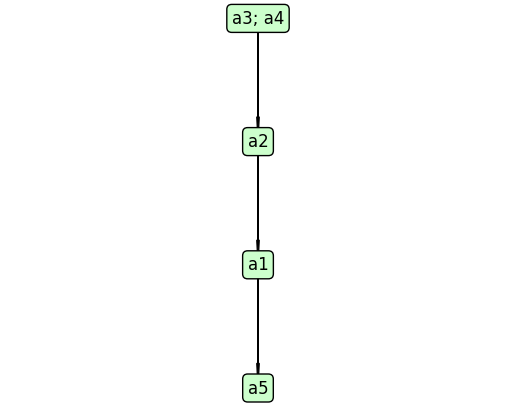

In [173]:
global_concordance, credibility, rank_D, rank_A, rank_N, rank_P = electre_iii(ds_list, P = P, Q = Q, V = V, W = W, graph = True)

In [174]:
rank_D_final = []
rank = []
k = 1
for i in range(0, len(rank_D)):
    splited = list(rank_D[i].split('; '))
    for s in splited:
        rank_D_final.append(s)
        rank.append(k)
    k += 1

resultado = pd.DataFrame()
resultado["Alternativas"] = rank_D_final
resultado["ELECTRE III"] = rank

dic = ds.iloc[:, 0:2].set_index("Alternativas")
dic = dic.join(resultado.set_index("Alternativas"), on = "Alternativas")
dic

,Notebook,ELECTRE III
Alternativas,,
a1,AVELL C62 MOB,3
a2,Avell A70 HYB,2
a3,AVELL A70 MOB,1
a4,AVELL A65 MOB,1
a5,ASUS M515,4


In [175]:
dic["GPT 3"] = [4,3,2,1,5]
dic["GPT 4"] = [5,4,1,2,3]

In [176]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [177]:
dic

,Notebook,ELECTRE III,GPT 3,GPT 4
Alternativas,,,,
a1,AVELL C62 MOB,3,4,5
a2,Avell A70 HYB,2,3,4
a3,AVELL A70 MOB,1,2,1
a4,AVELL A65 MOB,1,1,2
a5,ASUS M515,4,5,3


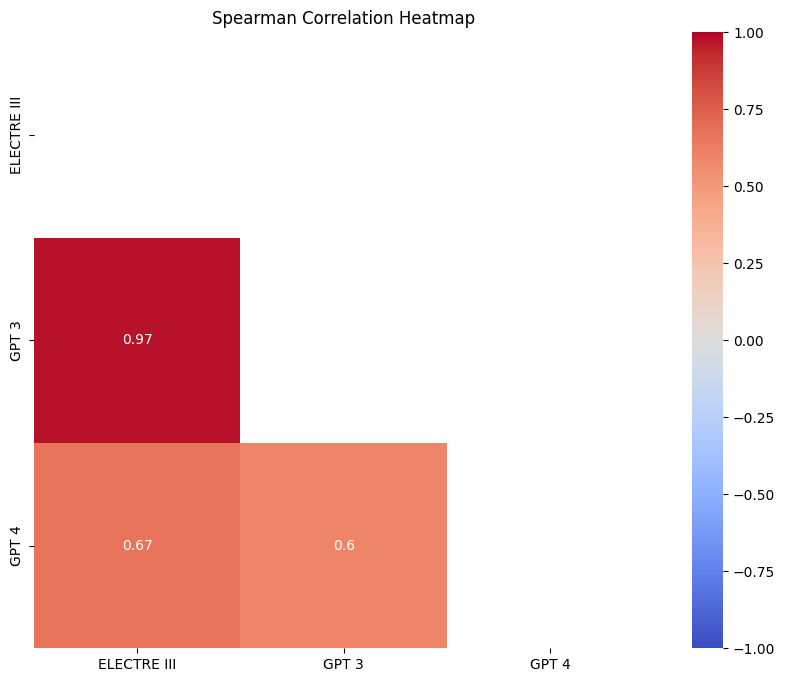

In [178]:
corr_matrix, _ = spearmanr(dic.iloc[:,1:])

# Cria uma máscara para a metade superior da matriz
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Converte a matriz de correlação em um DataFrame para melhor visualização
corr_df = pd.DataFrame(corr_matrix, columns=dic.iloc[:,1:].columns, index=dic.iloc[:,1:].columns)

# Cria um gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Spearman Correlation Heatmap')
plt.show()